In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
import tensorflow 
from tensorflow import keras
from keras_preprocessing.text import Tokenizer
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.initializers import Constant
from keras.layers import Embedding,Flatten,Dense
from keras import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix






[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sayus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=pd.read_csv("IMDB Dataset.csv")
df.head()



,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# The shape of the dataset
df.shape






(50000, 2)

In [4]:
# Checking for null values
df.isnull().sum()





review       0
sentiment    0
dtype: int64

In [5]:
# Checking for duplicate values
df.duplicated().sum()

# Removing duplicates
df=df.drop_duplicates()




In [6]:
# Checking the shape of the dataset after removing duplicates
df.shape





(49582, 2)

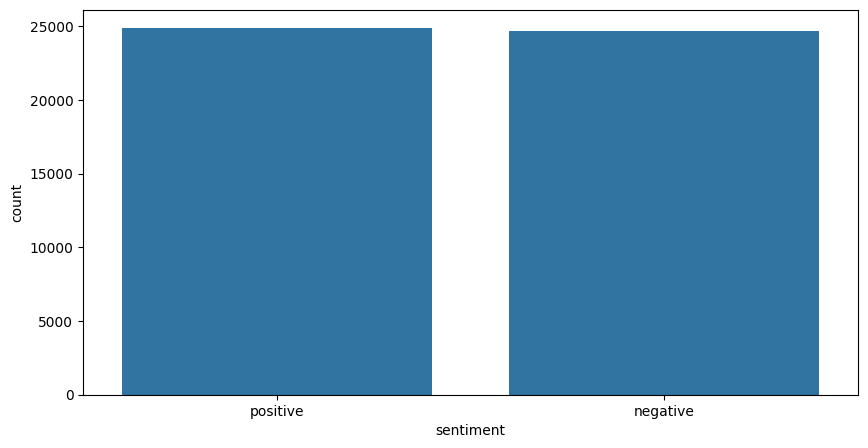

In [7]:
# checking the distribution of the sentiment
df["sentiment"].value_counts()

# Plotting the distribution of the sentiment
plt.figure(figsize=(10,5))
sns.countplot(x="sentiment",data=df)
plt.show()





In [8]:
# Checking the percentage of each sentiment
df["sentiment"].value_counts()/len(df)*100




sentiment
positive    50.187568
negative    49.812432
Name: count, dtype: float64

In [9]:
df['review'][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [10]:
# import re
# import nltk
# from nltk.corpus import stopwords

# # Download stopwords if not already downloaded
# nltk.download('stopwords', quiet=True)

# def preprocess_review(text):
#     # Convert to lowercase
#     text = text.lower()
    
#     # Remove HTML tags
#     text = re.sub('<[^<>]*>', '', text)
    
#     # Remove extra spaces
#     text = re.sub('\s+', ' ', text).strip()
    
#     # Remove punctuations and single characters
#     text = re.sub(r'\b\w\b|\W', ' ', text)
    
#     # Remove stopwords and numbers
#     stop_words = set(stopwords.words('english'))
#     text = ' '.join([word for word in text.split() if word not in stop_words and not word.isdigit()])
    
#     return text

# # Apply the preprocessing function to the 'review' column
# df['review'] = df['review'].apply(preprocess_review)

# # Display the first few preprocessed reviews
# print(df['review'].head())



from nltk.stem import WordNetLemmatizer

# Download required NLTK data files
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define preprocessing function
def preprocess_text(text):
    # 1. Lowercasing
    text = text.lower()
    
    # 2. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # 3. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # 4. Remove special characters and numbers
    text = re.sub(r'\W|\d', ' ', text)
    
    # 5. Tokenization
    tokens = text.split()
    
    # 6. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # 7. Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


# Apply preprocessing to the 'text' column
df['review'] = df['review'].apply(preprocess_text)

print(df['review'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sayus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sayus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0        one reviewer mentioned watching oz episode hoo...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake think zombie ...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    thought movie right good job creative original...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary school nu...
49998    going disagree previous comment side maltin on...
49999    one expects star trek movie high art fan expec...
Name: review, Length: 49582, dtype: object


In [11]:
df['review'][2]

'thought wonderful way spend time hot summer weekend sitting air conditioned theater watching light hearted comedy plot simplistic dialogue witty character likable even well bread suspected serial killer may disappointed realize match point risk addiction thought proof woody allen still fully control style many u grown love laughed one woody comedy year dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may crown jewel career wittier devil wear prada interesting superman great comedy go see friend'

In [12]:
# Converting the sentiment column to numerical values
df['sentiment']=df['sentiment'].map({'positive':1,'negative':0})

df.head()


,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake think zombie ...,0
4,petter mattei love time money visually stunnin...,1


In [16]:
# Applying Feature Extraction
# Using TF-IDF Vectorizer for feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2000)

# Transform the text data into TF-IDF features
X = tfidf.fit_transform(df['review']).toarray()



In [17]:
# Splitting the dataset into training and testing

y=df['sentiment'].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



In [18]:
# Applying Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)




MultinomialNB()

In [20]:
# Evaluating the model
y_pred=nb.predict(X_test)

# Calculating the accuracy
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")





Accuracy: 84.41%


In [21]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)




RandomForestClassifier()

In [22]:
# Predicting the sentiment
y_pred=rf.predict(X_test)

# Calculating the accuracy
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")



Accuracy: 83.23%
